# notebooks.qhdc_applications

## Setup

In [1]:
!git clone https://github.com/leonardoLavagna/qhdc

fatal: destination path 'qhdc' already exists and is not an empty directory.


In [2]:
import os
os.chdir('qhdc')

In [3]:
!pip install -r requirements.txt

## Pattern completion

### QuAM-based Architecture

First we solve the simple pattern completion problem introduced in https://arxiv.org/abs/quant-ph/9807053.

In [4]:
from functions.patterns_utilities import *
from functions.QUAM import *
from qiskit.visualization import plot_histogram

In [5]:
patterns = generate_patterns(4,4)
patterns

['0010', '1101', '0110', '1110']

In [6]:
state, data = QuAM(patterns, search="110?")

0.50 |0010> + 0.50 |0110> + 0.50 |1101> + 0.50 |1110>


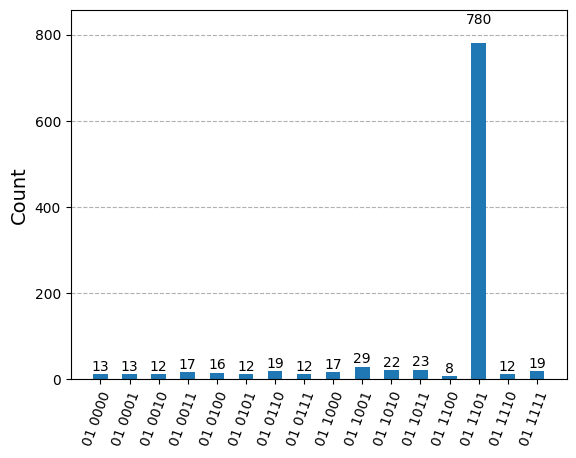

In [7]:
print(state)
plot_histogram(data)

Now we solve an associated similarity problem: given a string `search` not in the QuAM extract from the QuAM the most similar pattern. There are two options

**Option 1**
- Generate boolean expression `expression = similarity(patterns,search)`
- Build oracle `PhaseOracle(expression)`
- Grover search with given oracle

**Option 2**
- Encode state `|similarity(patterns, search)>`
- Run standard Grover to extended database `|patterns>, |similarity(patterns, search)>`

We will focus on Option 1, Option 2 is yet to be implemented.

In [8]:
search = "0101"

In [9]:
result = grover_search(qc=None, x=None, c=None, output=None, xc=None, cc=None, R=None, s=search, patterns=patterns, problem="similarity")
max(result.circuit_results[0], key=result.circuit_results[0].get)

'1101'

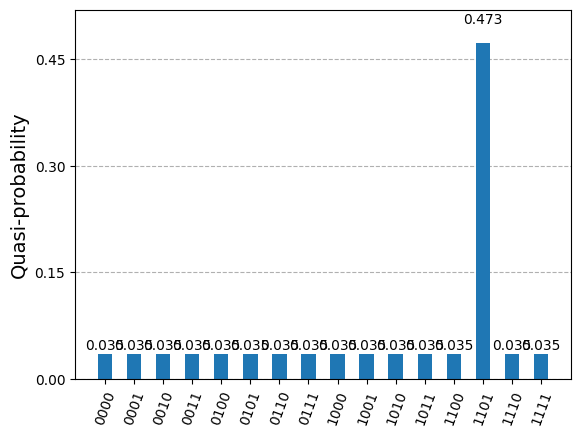

In [10]:
display(plot_histogram(result.circuit_results[0]))

### Circuit-based architecture

In [11]:
# TO BE IMPLEMENTED

## Clustering task

### QuAM-based architecture

In [12]:
# TO BE IMPLEMENTED

## Circuit-based architecture

In [13]:
# TO BE IMPLEMENTED

## Classification task

We start with a bit-string similarity problem related to protozoan mithocondrial genetic codes extracted from https://www.bioinformatics.org/sms2/genetic_code.html.

### QuAM-based architecture

In [14]:
# TO BE IMPLEMENTED

### Circuit-based architecture

In [15]:
import math

In [16]:
def encode_bitstring(bitstring: str, qr: QuantumRegister,
                     cr: ClassicalRegister, inverse=False) -> QuantumCircuit:
    """
    Create a quantum circuit for constructing the quantum superposition of the bitstring.

    Args:
        bitstring (str): Binary string to encode in the quantum circuit.
        qr (QuantumRegister): Quantum register to use for the circuit.
        cr (ClassicalRegister): Classical register to use for the circuit.
        inverse (bool): If True, creates the inverse of the encoding circuit.

    Returns:
        QuantumCircuit: Quantum circuit with the encoded bitstring.

    Raises:
        AssertionError: If the length of the bitstring is less than 2.
    """
    n = math.ceil(math.log2(len(bitstring))) + 1
    assert n > 2, "the length of bitstring must be at least 2"
    qc = QuantumCircuit(qr, cr)
    #the probability amplitude of the desired state
    #initialized to zero
    desired_vector = np.array([ 0.0 for i in range(2**n) ])
    amplitude = np.sqrt(1.0/2**(n-1))
    for i, b in enumerate(bitstring):
        pos = i * 2
        if b == "1":
            pos += 1
        desired_vector[pos] = amplitude
    # Normalize the desired vector to ensure it has a norm of 1
    desired_vector = desired_vector / np.linalg.norm(desired_vector)
    if not inverse:
        qc.initialize(desired_vector, qr)
        qc.barrier(qr)
    else:
        # Create a copy of the initialization vector and cast it to real numbers
        desired_vector_real = np.real(desired_vector)
        qc.initialize(desired_vector_real,qr)
        for i in range(n):
            qc.measure(qr[i], cr[i])
    return qc


def compress(binary_string: str, k: int) -> str:
    """
    Compress a binary string to a fixed length k using SHA-256 hashing.

    Args:
        binary_string (str): The binary string to be compressed.
        k (int): The length of the compressed binary string.

    Returns:
        str: The compressed binary string of length k.

    Raises:
        AssertionError: If the length of the binary string is not a multiple of 8.
    """
    assert len(binary_string) % 8 == 0, "Binary string length must be a multiple of 8"
    # Convert binary string to bytes
    byte_length = len(binary_string) // 8
    byte_data = int(binary_string, 2).to_bytes(byte_length, byteorder='big')
    # Compute the SHA-256 hash of the byte data
    hash_object = hashlib.sha256(byte_data)
    hash_digest = hash_object.digest()
    # Convert hash digest to a binary string
    hash_binary_string = ''.join(format(byte, '08b') for byte in hash_digest)
    # Take the first k bits of the binary hash string
    compressed_binary_string = hash_binary_string[:k]
    return compressed_binary_string


def retrieve_original_from_compressed(compressed_string: str, lookup_table: Dict) -> str:
    """
    Retrieve the original binary string from the compressed string using a lookup table.

    Args:
        compressed_string (str): The compressed binary string.

    Returns:
        str: The original binary string, or None if not found.
    """
    return lookup_table.get(compressed_string, None)


def find_keys_by_value(d: Dict, target_value) -> List:
    """
    Find all keys in a dictionary that have a specific target value.

    Args:
        d (Dict): The dictionary to search.
        target_value: The value to search for.

    Returns:
        List: A list of keys that have the target value.
    """
    keys = [key for key, value in d.items() if value == target_value]
    return keys

In [17]:
#Yeast Mitochondrial, Protozoan Mitochondrial, and Bacterial Code
YEAST     = "----------------------------------MM----------------------------"
PROTOZOAN = "--MM---------------M------------MMMM---------------M------------"
BACTERIAL = "---M---------------M------------MMMM---------------M------------"

### QuAM-based Architecture

In [18]:
# Preprocessing
YEAST_bin = list(YEAST)
PROTOZOAN_bin = list(PROTOZOAN)
BACTERIAL_bin = list(BACTERIAL)
for i in range(len(YEAST_bin)):
    if YEAST_bin[i] == "-":
        YEAST_bin[i] = 0
    if YEAST_bin[i] == "M":
        YEAST_bin[i] = 1
for i in range(len(PROTOZOAN_bin)):
    if PROTOZOAN_bin[i] == "-":
        PROTOZOAN_bin[i] = 0
    if PROTOZOAN_bin[i] == "M":
        PROTOZOAN_bin[i] = 1
for i in range(len(BACTERIAL_bin)):
    if BACTERIAL_bin[i] == "-":
        BACTERIAL_bin[i] = 0
    if BACTERIAL_bin[i] == "M":
        BACTERIAL_bin[i] = 1

In [19]:
patterns = [''.join(str(bit) for bit in YEAST_bin), ''.join(str(bit) for bit in BACTERIAL_bin)]
search = [''.join(str(bit) for bit in PROTOZOAN_bin)]
search = search[0]
search

'0011000000000000000100000000000011110000000000000001000000000000'

**Remark 2 .** If you try the following
```
result = grover_search(qc=None, x=None, c=None, output=None, xc=None, cc=None, R=None, s=search, patterns=patterns, problem="similarity")
max(result.circuit_results[0], key=result.circuit_results[0].get)
```
you will get an error:
```
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-182-82261044df0e> in <cell line: 1>()
----> 1 result = grover_search(qc=None, x=None, c=None, output=None, xc=None, cc=None, R=None, s=search, patterns=patterns, problem="similarity")
      2 max(result.circuit_results[0], key=result.circuit_results[0].get)

1 frames
/usr/local/lib/python3.10/dist-packages/qiskit/quantum_info/states/statevector.py in from_label(cls, label)
    698         # Initialize Z eigenstate vector
    699         num_qubits = len(label)
--> 700         data = np.zeros(1 << num_qubits, dtype=complex)
    701         pos = int(z_label, 2)
    702         data[pos] = 1

ValueError: Maximum allowed dimension exceeded
```
hashing is needed...

In [20]:
k = 8
patterns_comp = []
for pattern in patterns:
    pattern = compress(pattern,k)
    patterns_comp.append(pattern)
search_comp = compress(search,k)
print(patterns_comp, search_comp)

lookup_table = {}
for original_string in patterns:
    compressed_string = compress(original_string,k)
    lookup_table[compressed_string] = original_string
lookup_table

['10011000', '01001110'] 10110001


{'10011000': '0000000000000000000000000000000000110000000000000000000000000000',
 '01001110': '0001000000000000000100000000000011110000000000000001000000000000'}

Now we can apply Grover...

In [21]:
result = grover_search(qc=None, x=None, c=None, output=None, xc=None, cc=None, R=None, s=search_comp, patterns=patterns_comp, problem="similarity")
max(result.circuit_results[0], key=result.circuit_results[0].get)

'10011000'

In [23]:
original_string = retrieve_original_from_compressed(max(result.circuit_results[0], key=result.circuit_results[0].get), lookup_table)
answer = [0]*len(original_string)
for i in range(len(original_string)):
    if original_string[i] == "0":
        answer[i] = "-"
    if original_string[i] == "1":
        answer[i] = "M"
answer = ''.join(answer)
answer

'----------------------------------MM----------------------------'

### Circuit-based architecture

In [24]:
# Get corresponding quantum circuits (direct)
codes = {"YEAST": YEAST,"PROTOZOAN": PROTOZOAN,"BACTERIAL":BACTERIAL}
n = math.ceil(math.log2(len(YEAST))) + 1
qr = QuantumRegister(n)
cr = ClassicalRegister(n)
qc_yeast = encode_bitstring(YEAST, qr, cr)
qc_protozoan = encode_bitstring(PROTOZOAN, qr, cr)
qc_bacterial = encode_bitstring(BACTERIAL, qr, cr)
circs = {"YEAST": qc_yeast, "PROTOZOAN": qc_protozoan, "BACTERIAL": qc_bacterial}
#qc_yeast.draw()

In [25]:
# Get corresponding quantum circuits (inverse)
inverse_qc_yeast = encode_bitstring(YEAST,qr,cr, inverse=True)
inverse_qc_protozoan = encode_bitstring(PROTOZOAN, qr, cr, inverse=True)
inverse_qc_bacterial = encode_bitstring(BACTERIAL, qr, cr, inverse=True)
inverse_circs = {"YEAST": inverse_qc_yeast, "PROTOZOAN": inverse_qc_protozoan, "BACTERIAL": inverse_qc_bacterial}

In [26]:
key = "PROTOZOAN"
shots = 1000

combined_circs = {}
count = {}

most_similar, most_similar_score = "", -1.0

for other_key in inverse_circs:
    if other_key == key:
        continue
    #combined circuits to look for similar codes
    combined_circs[other_key] = circs[key].compose(inverse_circs[other_key])
    backend = Aer.get_backend("qasm_simulator")
    t_qc = transpile(combined_circs[other_key], backend=backend)
    job = backend.run(t_qc)
    #data = job.result().get_counts(qc)
    #job = execute(combined_circs[other_key], backend=backend,shots=shots)
    st = job.result().get_counts(combined_circs[other_key])
    if "0"*n in st:
        sim_score = st["0"*n]/shots
    else:
        sim_score = 0.0

    print("Similarity score of",key,"and",other_key,"is",sim_score)
    if most_similar_score < sim_score:
        most_similar, most_similar_score = other_key, sim_score

print(key,"is most similar to", most_similar)

Similarity score of PROTOZOAN and YEAST is 0.015
Similarity score of PROTOZOAN and BACTERIAL is 0.018
PROTOZOAN is most similar to BACTERIAL
